<a href="https://colab.research.google.com/github/ZaimaSartajTaheri/ResearchCodes/blob/main/Niloy_DenseNet121_NonTuned_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 8376 images belonging to 3 classes.
Found 2790 images belonging to 3 classes.
Found 2792 images belonging to 3 classes.
Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_8 (ZeroPadding2D (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_8[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         

Text(0.5, 1.0, 'Accuracy Evolution')

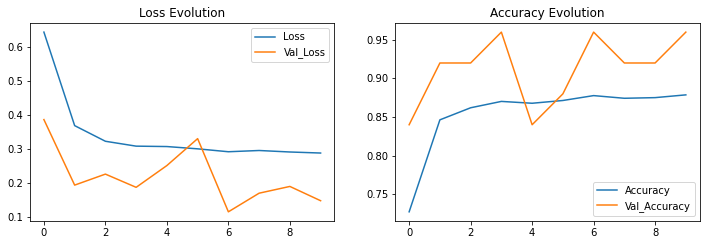

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from tensorflow.keras import datasets, layers, models
import tensorflow_hub as hub
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
import tensorboard

X_train_path = "/content/drive/MyDrive/Research/v1_0/Train"
X_test_path = "/content/drive/MyDrive/Research/v1_0/Test"
Val_test_path = "/content/drive/MyDrive/Research/v1_0/Val"

# design the traing dataset
train_datagen = image.ImageDataGenerator(
    rescale=1/255,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

X_train = train_datagen.flow_from_directory(
    X_train_path,
    target_size=(224, 224),
    batch_size=32,
    shuffle=True, 
    class_mode = "categorical"
)

# design the test dataset
# test_datagen = image.ImageDataGenerator(rescale=1/255)

X_test = train_datagen.flow_from_directory(
    X_test_path,
    target_size=(224, 224),
    batch_size=1,
    shuffle=False,
    class_mode= "categorical"
)

# design the test dataset
# Val_datagen = image.ImageDataGenerator(rescale=1/255)

Val_test = train_datagen.flow_from_directory(
    Val_test_path,
    target_size=(224, 224),
    batch_size=1,
    shuffle=False,
    class_mode= "categorical"
)

# print(X_train.samples)
# y_train = X_train.classes
# y_test = X_test.classes

# TL Model
from keras.applications.densenet import DenseNet121
base_model = DenseNet121(
    include_top=False, weights='imagenet',input_shape = (224, 224, 3)
)

# changing the output layer of the TL layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(.5)(x)
predictions = Dense(X_train.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(
    optimizer='adam',  # optimizer chooses the type of gradient descent one want to apply
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

r = model.fit(X_train, epochs=10, steps_per_epoch = 262, validation_data=(
    Val_test), validation_steps = 25)

# evaluate on test set
model.evaluate(X_test)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

